In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import uibcdf_tools as uibcdf_tools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Color maps

## UIBCDF Color Palettes

The UIBCDF color palettes are defined to make the color chosen easy at the time of creating a plot or a figure. At the same time using the palettes imprints a recognizable mark to figures, slides, posters and papers.

Every palette is made of 16 colors: "light_red", "red", "dark_red", "light_green", "green", "dark_green", "light_blue", "blue", "dark_blue", "light_yellow", "yellow", "dark_yellow", "light_orange", "orange", "dark_orange", "light_purple", "purple", "dark_purple", "light_brown", "brown", "dark_brown", "light_gray", "gray", "dark_gray" and "white".

Although the purpose of this module is having predefined color palettes, a customized palette can be created just with a dictionary where the 16 colors are defined in hexadecimal color code. The webpages [coolors.co](https://coolors.co/) and [colormind.io](http://colormind.io/) can be used to choose a new color palette.

In [3]:
my_colors = {
    'dark_red' : '#9B1C1C',
    'red' : '#D62828',
    'light_red' : '#E98686',
    'dark_green' : '#384733',
    'green' : '#77966D',
    'light_green' : '#9CB295',
    'dark_blue' : '#00283D',
    'blue' : '#006AA3',
    'light_blue' : '#85D4FF',
    'dark_yellow' : '#C88304',
    'yellow' : '#FBAF23',
    'light_yellow' : '#FCCC73',
    'dark_orange' : '#C92E03',
    'orange' : '#F13704',
    'light_orange' : '#FC7753',
    'dark_purple' : '#341E24',
    'purple' : '#8E5263',
    'light_purple' : '#D9BDC5',
    'dark_brown' : '#261702',
    'brown' : '#4C2E05',
    'light_brown' : '#865209',
    'dark_gray' : '#3E3C3D',
    'gray' : '#828783',
    'light_gray' : '#B6B9B7',
    'white' : '#FBFFFE'
}

In [4]:
my_palette = uibcdf_tools.colors.Palette(my_colors)

### Palette_1

At this time there is only a color palette predefined named 'Palette_1':

In [5]:
palette = uibcdf_tools.colors.Palette_1()

Colors are storaged in a dictionary where color names are the keys:

In [6]:
palette.color

{'dark_red': '#9B1C1C',
 'red': '#D62828',
 'light_red': '#E98686',
 'dark_green': '#384733',
 'green': '#77966D',
 'light_green': '#9CB295',
 'dark_blue': '#00283D',
 'blue': '#006AA3',
 'light_blue': '#85D4FF',
 'dark_yellow': '#C88304',
 'yellow': '#FBAF23',
 'light_yellow': '#FCCC73',
 'dark_orange': '#C92E03',
 'orange': '#F13704',
 'light_orange': '#FC7753',
 'dark_purple': '#341E24',
 'purple': '#8E5263',
 'light_purple': '#D9BDC5',
 'dark_brown': '#261702',
 'brown': '#4C2E05',
 'light_brown': '#865209',
 'dark_gray': '#3E3C3D',
 'gray': '#828783',
 'light_gray': '#B6B9B7',
 'white': '#FBFFFE'}

Every palette has two methods to get the RGB or hexadecimal code of each color:

In [7]:
palette.rgb('red')

(0.8392156862745098, 0.1568627450980392, 0.1568627450980392)

In [8]:
palette.hex('red')

'#D62828'

Lets see how this palette looks:

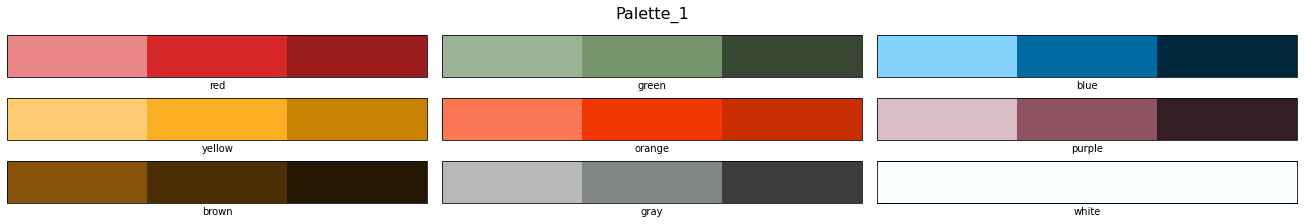

In [9]:
palette = uibcdf_tools.colors.Palette_1()

color_names = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown', 'gray']
color_place = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1]]

fig, axes= plt.subplots(3,3,figsize=(18, 3), constrained_layout=True)

fig.suptitle('Palette_1', fontsize=16)

for name, p in zip(color_names, color_place):
    cmap = mpl.colors.ListedColormap([palette.rgb('light_'+name), palette.rgb(name), palette.rgb('dark_'+name)])
    cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap), cax=axes[p[0],p[1]], orientation='horizontal', label=name)
    cbar.set_ticks([])

cmap = mpl.colors.ListedColormap([palette.rgb('white')])
cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap), cax=axes[2,2], orientation='horizontal', label='white')
cbar.set_ticks([])
    
plt.show()

## Color maps

In addition to having color palettes predefined, color gradients built as `cmap` objects from matplotlib are also available in this module. These gradients depend on the color palette used. Lets show how they work with 'Palette_1':

In [10]:
palette = uibcdf_tools.colors.Palette_1()

In [11]:
cmap = uibcdf_tools.matplotlib.color_maps.get_cmap('red_white_blue', palette)

The new object `cmap` gives an RGBA color code to each float number in the range [0.0, 1.0]

In [12]:
cmap(0.26)

(0.9143252595155709, 0.5933102652825836, 0.591280276816609, 1.0)

This way our color map can already be used in any matplotlib method accepting cmaps:

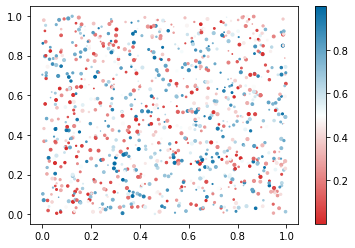

In [13]:
x_coors = np.random.random(1000)
y_coors = np.random.random(1000)
sizes = 10.0*np.random.random(1000)
color_value = np.random.random(1000)

fig, ax = plt.subplots()
sct = ax.scatter(x_coors, y_coors, s=sizes, c=color_value, cmap=cmap)
fig.colorbar(sct, ax=ax)
plt.show()

Lets then show the `cmap` gradient corresponding to 'Palette_1' with name 'red_white_blue': 

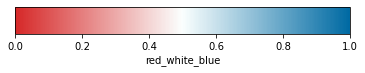

In [14]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = uibcdf_tools.matplotlib.color_maps.get_cmap('red_white_blue', palette)
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='red_white_blue')
plt.show()

The method `uibcdf_tools.matplotlib.color_maps.get_cmap` accepts a third input argument: `tone`. This argument takes the value "None" by default, but it can take the string "light" or "dark" to produce the color scales corresponding to the light or dark colors (red and blue in this case); 

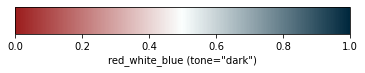

In [15]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = uibcdf_tools.matplotlib.color_maps.get_cmap('red_white_blue', palette, tone='dark')
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='red_white_blue (tone="dark")')
plt.show()

Lets see all cmaps predefined with 'Palette_1':

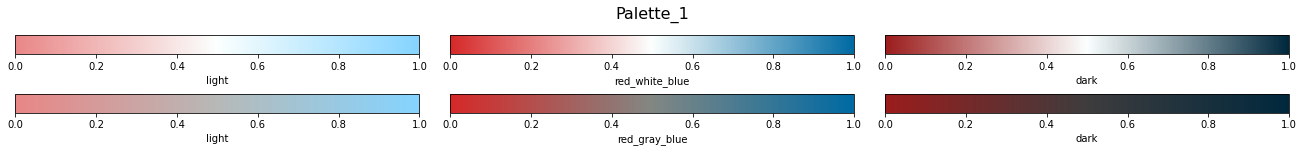

In [16]:
n_bars = len(uibcdf_tools.matplotlib.color_maps.cmap_names)

fig, axes = plt.subplots(n_bars, 3, figsize=(18, n_bars), constrained_layout=True)
fig.suptitle('Palette_1', fontsize=16)

ax_ind = 0
for name in uibcdf_tools.matplotlib.color_maps.cmap_names:

    cmap = uibcdf_tools.matplotlib.color_maps.get_cmap(name, palette, tone='light')
    fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap), cax=axes[ax_ind, 0], orientation='horizontal',
                 label='light')

    cmap = uibcdf_tools.matplotlib.color_maps.get_cmap(name, palette)
    fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap), cax=axes[ax_ind, 1], orientation='horizontal',
                 label=name)

    cmap = uibcdf_tools.matplotlib.color_maps.get_cmap(name, palette, tone='dark')
    fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap), cax=axes[ax_ind, 2], orientation='horizontal',
                 label='dark')
    ax_ind+=1
    
plt.show()

Given a color palette, a new `cmap` can be easily defined with the help of the method `uibcdf_tools.matplotlib.color_maps.make_cmap_linear`. A list or tuple of pairs value-color is needed:

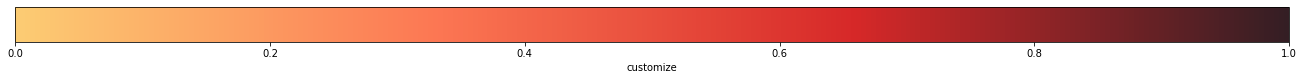

In [17]:
name = 'customize'
values = [[0.0,'light_yellow'], [0.33,'light_orange'], [0.66,'red'], [1.0,'dark_purple']]
cmap = uibcdf_tools.matplotlib.color_maps.make_cmap_linear('customize', palette, values)

fig, ax = plt.subplots(figsize=(18, 1), constrained_layout=True)
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap), cax=ax, orientation='horizontal', label='customize')
    
plt.show()